This notebook needs to be tidied up!

Increasing the kratio to 1000 means the time integrals must be done over a broader range, increasing memory needs.

Target: A modified DBI template is a pretty good approximation to the expected result - how well can $P^{n_s}_1$ at $p_{max}=30$ match it?

In [1]:
from general_coeff_funcs import set_up_mixed_basis, get_coeffs, corr, various_lines_plot, plot_sqz, print_and_plot_tetra
from shapes import DBI
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

Using numpy leggauss, less accurate than QUADPTS


In [2]:
template = lambda x, y, z: DBI(x, y, z, scaling=0.02844)
#template = lambda x, y, z: DBI(x, y, z, scaling=0.0351)

In [3]:
pmax = 30
k_min_templ_1000, k_max_templ_1000 = 1., 1000.
basis_p1_30_templ_1000 = set_up_mixed_basis(k_min_templ_1000, k_max_templ_1000, pmax, n_s_mod=-0.0351, verbose=False, quad=False)
#k_min_templ_550, k_max_templ_550 = 1., 550.
#basis_p1_30_templ_550 = set_up_mixed_basis(k_min_templ_550, k_max_templ_550, pmax, n_s_mod=-0.0351, verbose=False, quad=False)

In [4]:
#templ_cs_550 = get_coeffs(template, basis_p1_30_templ_550, k_min_templ_550, k_max_templ_550, Nk=250)
templ_cs_1000 = get_coeffs(template, basis_p1_30_templ_1000, k_min_templ_1000, k_max_templ_1000, Nk=250)

In [5]:
#res_550 = np.sqrt(2-2*corr(k_min_templ_550, k_max_templ_550, template, templ_cs_550, basis_p1_30_templ_550, Nk=200))
#print('p1_30_550 relative error to template:', res_550)
res_1000 = np.sqrt(2-2*corr(k_min_templ_1000, k_max_templ_1000, template, templ_cs_1000, basis_p1_30_templ_1000, Nk=200))
print('p1_30_1000 relative error to template:', res_1000)

p1_30_1000 relative error to template: 0.009943012555639293


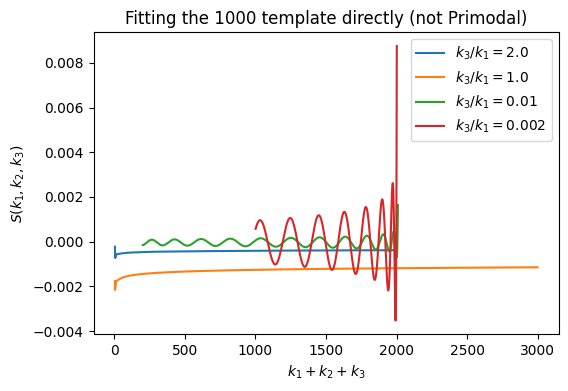

In [6]:
#fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
#axs = axs.flatten()
#various_lines_plot(k_min_templ_550, k_max_templ_550, templ_cs_550, basis_p1_30_templ_550, title='Fitting the 550 template directly (not Primodal)', ax=axs[0])
various_lines_plot(k_min_templ_1000, k_max_templ_1000, templ_cs_1000, basis_p1_30_templ_1000, title='Fitting the 1000 template directly (not Primodal)')#, ax=axs[1])
#plt.tight_layout()
#plt.show()

Doesn't capture the squeezed limit perfectly, as the basis scaling doesn't match the template scaling - but, it is much better than no scaling at all.

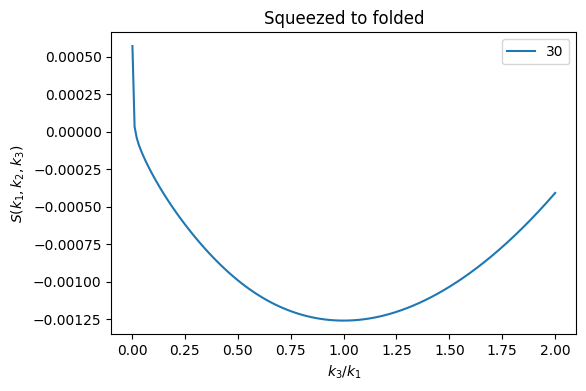

In [7]:
#plot_sqz(k_min_templ_550, k_max_templ_550, templ_cs_550, basis_p1_30_templ_550, Nk=100, label='')
plot_sqz(k_min_templ_1000, k_max_templ_1000, templ_cs_1000, basis_p1_30_templ_1000, Nk=100, label='')

So, even with perfect numerics, Primodal probably can't do better than this for $k_{max}/k_{min}=1000$ and $p_{max}=30$.

Moving on now to actual results from Primodal.
Has $P^{n_s}_{01}$ at $p_{max}=55$ converged, and how well does it match the approx template?

In [8]:
from general_coeff_funcs import load_coeffs, convert_between_bases, err_between_coeffs
fname = "example_coefficients/not_matching_scaling_dbi_l55.csv"
#fname = "example_coefficients/matching_scaling_dbi_l55.csv"
k_min, k_max, cs_p01_55 = load_coeffs(fname)

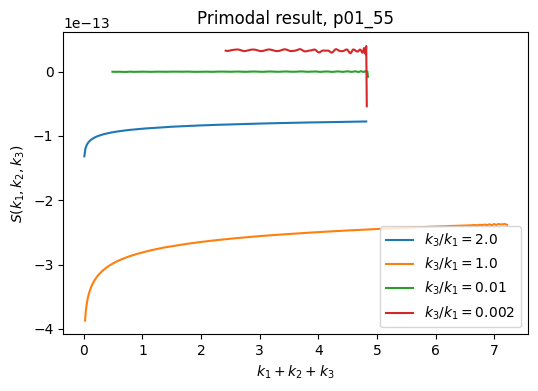

Primodal p01_55 match to template: 0.00334827721208963


In [9]:
basis_p01_55 = set_up_mixed_basis(k_min, k_max, 55, n_s_mod=1-0.0351, verbose=False, quad=True)
various_lines_plot(k_min, k_max, cs_p01_55, basis_p01_55, Nk=500, title='Primodal result, p01_55')
xs = np.linspace(3*k_min,3*k_max,100)
#plt.plot(xs, -3.3e-14*xs**(3*-0.0351), '--', label='0.0351')
#plt.plot(xs, -3.3e-14*xs**(3*-0.02844), '--', label='0.02844')
#plt.plot(xs, -2.8e-13*xs**(3*-0.0351), '--', label='0.0351')
#plt.plot(xs, -2.8e-13*xs**(3*-0.02844), '--', label='0.02844')
plt.legend(loc= 'lower right' )
plt.show()
res = np.sqrt(2-2*corr(k_min, k_max, template, cs_p01_55, basis_p01_55, Nk=200))
print('Primodal p01_55 match to template:', res)

In [10]:
basis_p01_45 = set_up_mixed_basis(k_min, k_max, 45, n_s_mod=1-0.0351, verbose=False, quad=True)
cs_p01_45 = convert_between_bases(basis_p01_55, basis_p01_45, k_min, k_max, cs_p01_55, Nk=1000)
res = err_between_coeffs(k_min, k_max, cs_p01_55, basis_p01_55, cs_p01_45, basis_p01_45, Ncorr=300)
print("Relative difference between p01_55 and p01_45 (has it converged?):", res)

Relative difference between p01_55 and p01_45 (has it converged?): 0.00038906706754927774


We reduce $P^{n_s}_{01}$ at $p_{max}=55$ to $P^{n_s}_1$ at $p_{max}=30$. How different are they?

In [11]:
basis_p1_30 = set_up_mixed_basis(k_min, k_max, 30, n_s_mod=-0.0351, verbose=False, quad=False)
cs_p1_30 = convert_between_bases(basis_p01_55, basis_p1_30, k_min, k_max, cs_p01_55, Nk=1000)

In [12]:
res = err_between_coeffs(k_min, k_max, cs_p01_55, basis_p01_55, cs_p1_30, basis_p1_30, Ncorr=400)
print("Relative difference between p01_55 and p1_30:", res)

Relative difference between p01_55 and p1_30: 0.0034976138022963592


In [13]:
res = np.sqrt(2-2*corr(k_min, k_max, template, cs_p1_30, basis_p1_30, Nk=200))
print('Primodal p1_30 match to template:', res)

Primodal p1_30 match to template: 0.004994893437637343


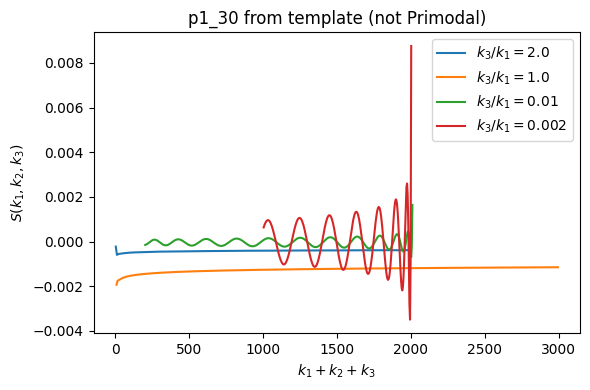

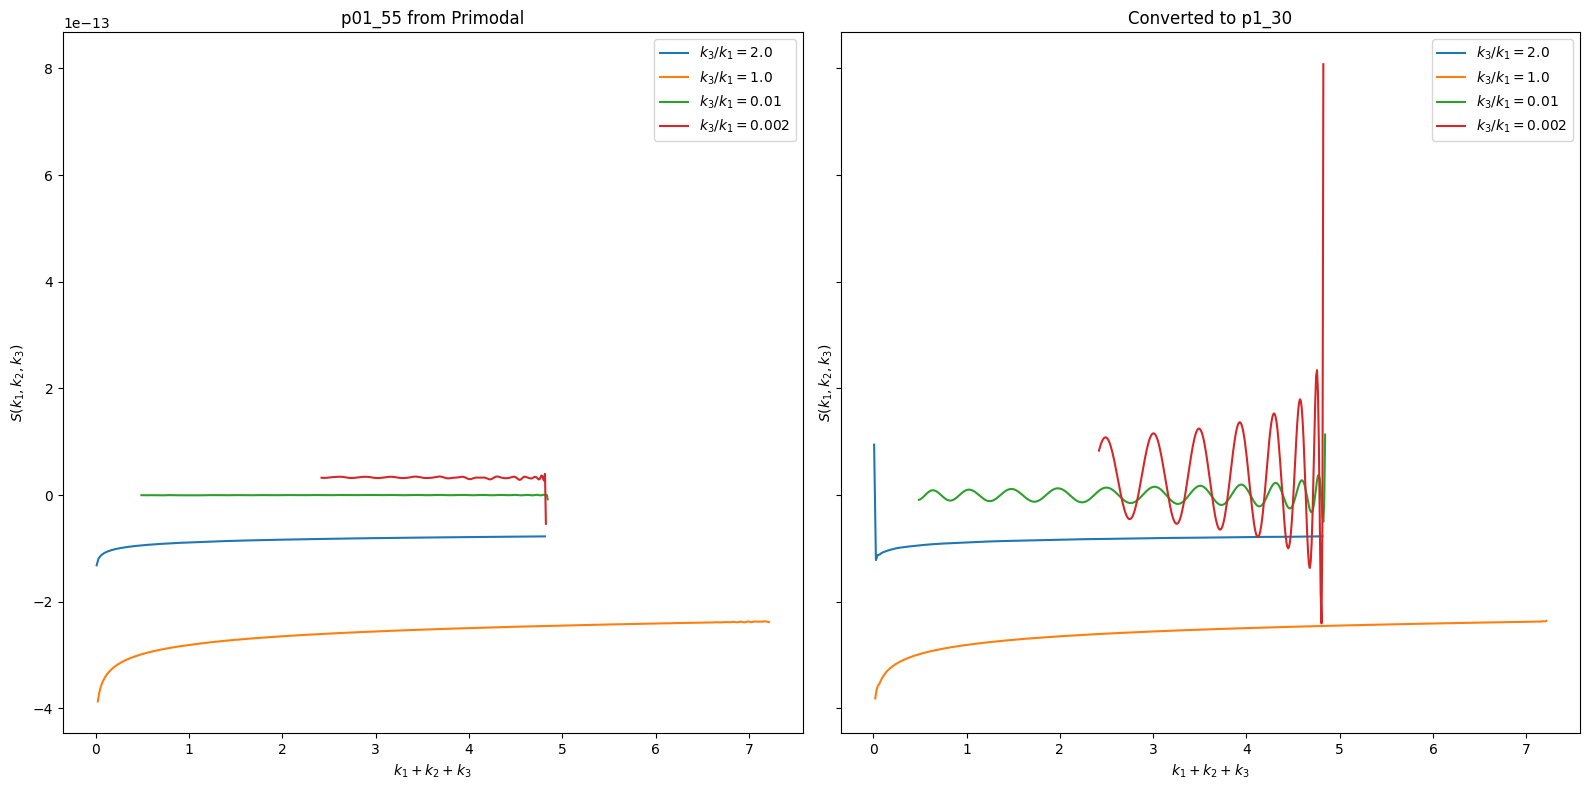

In [14]:
#mpl.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(1, 1)
various_lines_plot(1., 1000., templ_cs_1000, basis_p1_30_templ_1000, Nk=500, title='p1_30 from template (not Primodal)', ax=ax)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
axs = axs.flatten()
various_lines_plot(k_min, k_max, cs_p01_55, basis_p01_55, Nk=500, title='p01_55 from Primodal', ax=axs[0])
various_lines_plot(k_min, k_max, cs_p1_30, basis_p1_30, Nk=500, title='Converted to p1_30', ax=axs[1])
plt.tight_layout()
plt.show()

Even the best case, choosing $2(-2\varepsilon-\varepsilon_s-\eta)-2\varepsilon_s=-0.0351$, still only converges to around a percent.

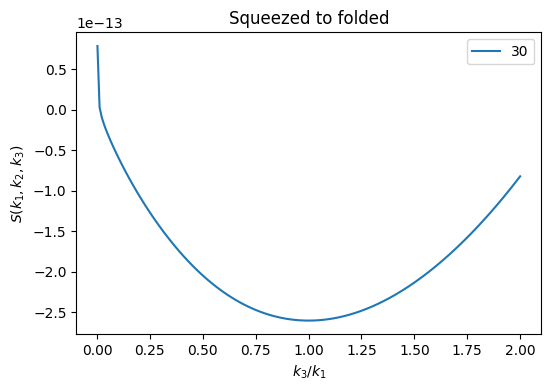

In [15]:
plot_sqz(k_min, k_max, cs_p1_30, basis_p1_30, Nk=100, label='')
#plt.xscale('log')
#plt.show()

In [16]:
#print_and_plot_tetra(k_min, k_max, cs_p1_30, basis_p1_30, "tetra_dbi_p1_30.csv", Nk=100)

In [17]:
#print_and_plot_tetra(k_min, k_max, cs_p01_55, basis_p01_55, "tetra_dbi_p01_55.csv", Nk=100)

For the time integral convergence: I'll try and either (1) get running on a machine with more RAM or (2) improve the code.

But how much do I need to worry about the slow pmax-convergence in the squeezed limit?

In [18]:
## # Using [27 Legendre polynomials aug'd by k^{n_s-1}] internally in Primodal,
## # then switching to p1_30 (i.e. [29 Legendre polynomials aug'd by k^{n_s-2}]) to include the spatial derivatives.
fname = "example_coefficients/primodal_dbi_l30.csv"
k_min, k_max, cs_p1_30_direct = load_coeffs(fname)
## # Using p1_30 throughout.
fname = "example_coefficients/primodal_dbi_p1_throughout.csv"
k_min, k_max, cs_p1_30_throughout = load_coeffs(fname)

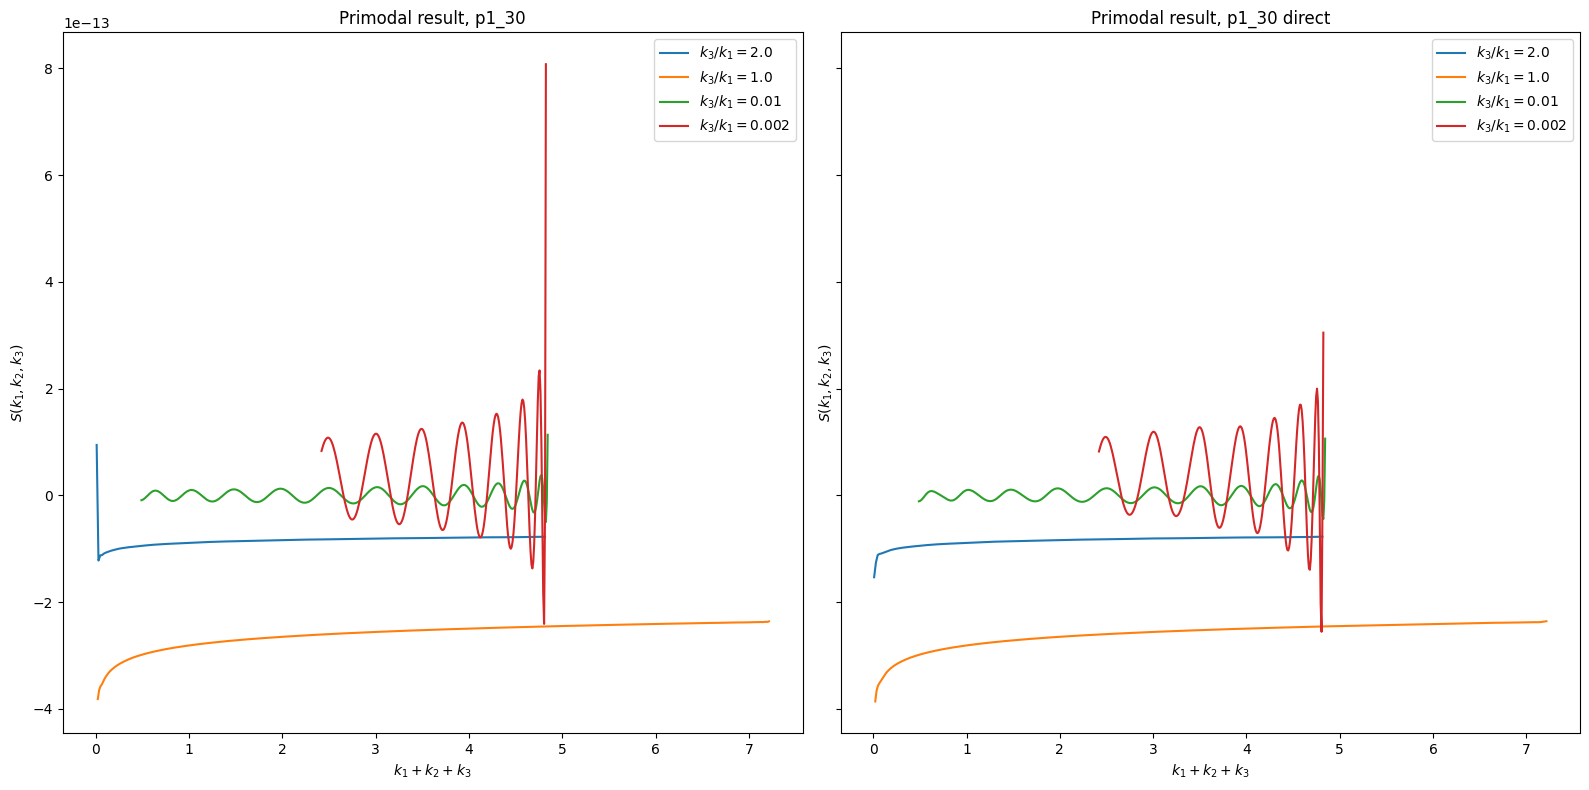

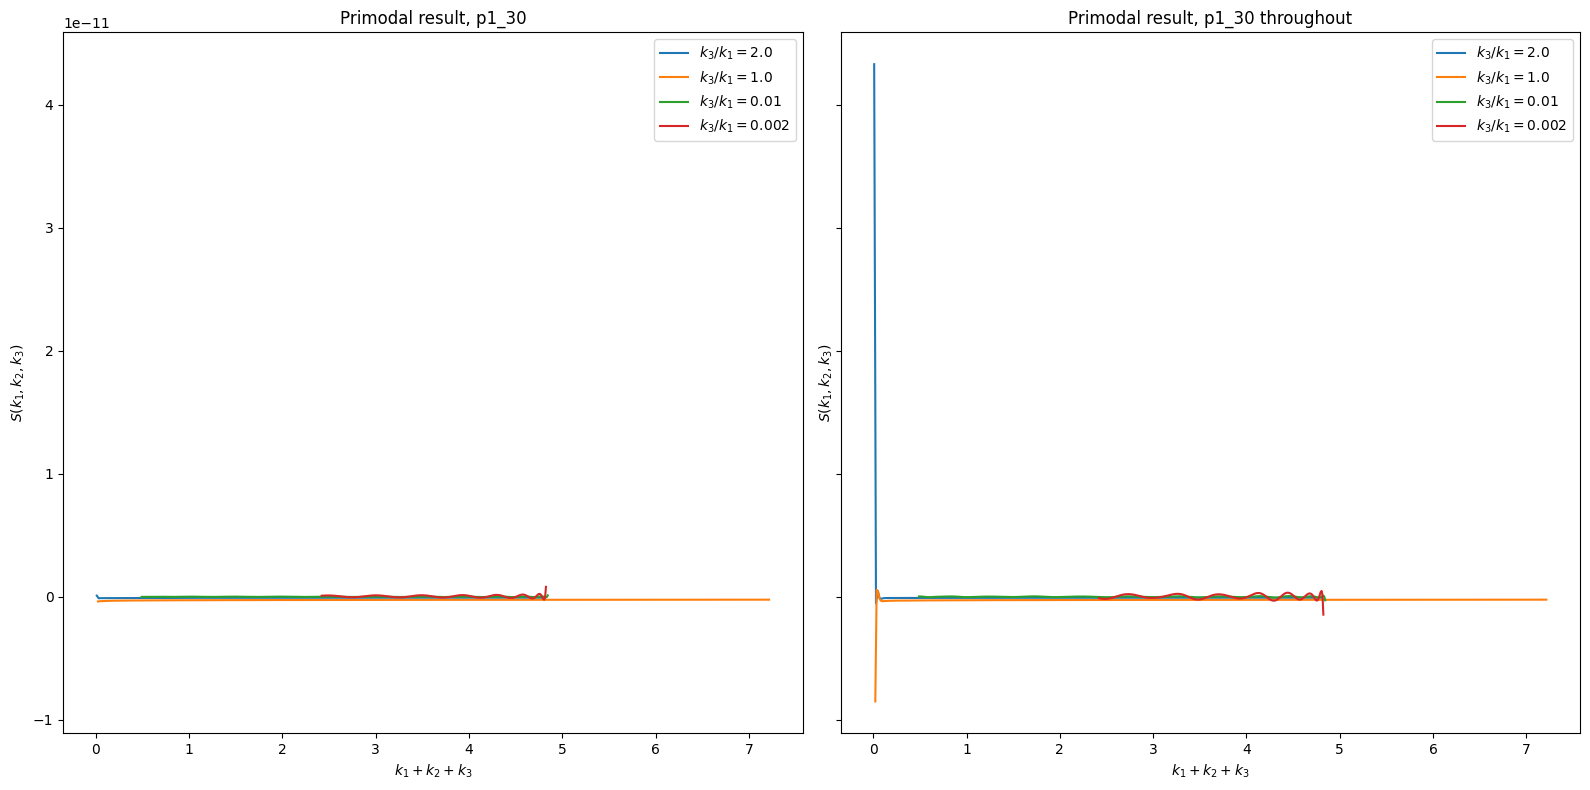

In [19]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
axs = axs.flatten()
various_lines_plot(k_min, k_max, cs_p1_30, basis_p1_30, Nk=500, title='Primodal result, p1_30', ax=axs[0])
various_lines_plot(k_min, k_max, cs_p1_30_direct, basis_p1_30, Nk=500, title='Primodal result, p1_30 direct', ax=axs[1])
plt.tight_layout()
plt.show()
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
axs = axs.flatten()
various_lines_plot(k_min, k_max, cs_p1_30, basis_p1_30, Nk=500, title='Primodal result, p1_30', ax=axs[0])
various_lines_plot(k_min, k_max, cs_p1_30_throughout, basis_p1_30, Nk=500, title='Primodal result, p1_30 throughout', ax=axs[1])
plt.tight_layout()
plt.show()

In [20]:
res = err_between_coeffs(k_min, k_max, cs_p1_30, basis_p1_30, cs_p1_30_direct, basis_p1_30, Ncorr=400)
print("Relative difference between p1_30 and p1_30_direct:", res)

Relative difference between p1_30 and p1_30_direct: 0.0004574671149716714


In [21]:
res = err_between_coeffs(k_min, k_max, cs_p01_55, basis_p01_55, cs_p1_30, basis_p1_30, Ncorr=400)
print("Relative difference between p01_55 and p1_30           :", res)
res = err_between_coeffs(k_min, k_max, cs_p01_55, basis_p01_55, cs_p1_30_direct, basis_p1_30, Ncorr=400)
print("Relative difference between p01_55 and p1_30_direct    :", res)
res = err_between_coeffs(k_min, k_max, cs_p01_55, basis_p01_55, cs_p1_30_throughout, basis_p1_30, Ncorr=400)
print("Relative difference between p01_55 and p1_30_throughout:", res)

Relative difference between p01_55 and p1_30           : 0.0034976138022963592
Relative difference between p01_55 and p1_30_direct    : 0.0033210655727101595
Relative difference between p01_55 and p1_30_throughout: 0.016041378159166658
